In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('Customer_retention_dataset.xlsx')

In [4]:
df.head(1)

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   

  3 Which city do you shop online from?  \
0                                 Delhi   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       

  Longer time in displaying graphics and photos (promotion, sales period)  \
0                                          Amazon.in                        

  Late declaration of price (promotion, sales period)  \
0                                       Flipkart.com    

  Longer page loading time (promotion, sales period)  \
0                                       Flipkart.com   

  Limited mode of payment on most products (promotion, sales period)  \
0                                          Amazon.in                   

  Longer delivery period Change in website/Application design  \
0              Paytm.com                         Flipkart.com   

  Frequent disruption when moving from one page to another  \
0                                          Amazon.in         

  Website is as efficient as before  \
0                         Amazon.in   

  Which of the Indian online retailer would you recommend to a friend?  
0                                       Flipkart.com                    

[1 rows x 71 columns]

In [5]:
df.shape

(269, 71)

The aim of this problem is to effectively analyse the diffrerent factors influencing customer retenstion and activation in e-commerece retail.

The dataset has information regarding these features, it also gives an insight of the recommended websites.

Multiple variables concerning costomer age, gender, city etc along with the ease of functioning of websites is mentioned in this dataset. Also, the effect of design,navigation, services, offers etc of the site on the user for thier shopping needs is present.


In [6]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [8]:
df.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                   int64
5 Since How Long You are Shopping Online ?                                                                      

We look at all the column names and the associated datatypes to fameliarize with the data we are handeling.

There is no assignment of incorrect datatypes to any of the features.

Looking at the Dataframe, we can also conclude that all the variables are categorical in nature.(even though 'What is the pincode of where you shop online from?' is of int, it is not quantifiable)

Most of the features are nominal with the exception of column such as 'How old are you?' indicating age group which is ordinal.

In [9]:
# checking the different categories of features and the presence of missing values
df_statistic = pd.DataFrame(columns = ['column', 'values','num_of_unique_values','num_of_unique_values_without_nan','num_miss','pct_miss'])
ds = pd.DataFrame()

for c in df.columns:
    ds['column'] =[c]
    ds['values'] = [df[c].unique()]
    ds['num_of_unique_values'] = len(list(df[c].unique()))
    ds['num_of_unique_values_without_nan'] = int(df[c].nunique())
    ds['num_miss'] = df[c].isnull().sum()
    ds['pct_miss'] = (df[c].isnull().sum()/len(df)).round(3)*100
    df_statistic = df_statistic.append(ds)
df_statistic

column  \
0                              1Gender of respondent   
0                                2 How old are you?    
0              3 Which city do you shop online from?   
0  4 What is the Pin Code of where you shop onlin...   
0         5 Since How Long You are Shopping Online ?   
0  6 How many times you have made an online purch...   
0  7 How do you access the internet while shoppin...   
0  8 Which device do you use to access the online...   
0  9 What is the screen size of your mobile devic...   
0  10 What is the operating system (OS) of your d...   
0  11 What browser do you run on your device to a...   
0  12 Which channel did you follow to arrive at y...   
0  13 After first visit, how do you reach the onl...   
0  14 How much time do you explore the e- retail ...   
0  15 What is your preferred payment Option?\t\t\...   
0  16 How frequently do you abandon (selecting an...   
0  17 Why did you abandon the “Bag”, “Shopping Ca...   
0  18 The content on the website must be easy to ...   
0  19 Information on similar product to the one h...   
0  20 Complete information on listed seller and p...   
0  21 All relevant information on listed products...   
0                   22 Ease of navigation in website   
0                    23 Loading and processing speed   
0          24 User friendly Interface of the website   
0                      25 Convenient Payment methods   
0  26 Trust that the online retail store will ful...   
0  27 Empathy (readiness to assist with queries) ...   
0  28 Being able to guarantee the privacy of the ...   
0  29 Responsiveness, availability of several com...   
0  30 Online shopping gives monetary benefit and ...   
0       31 Enjoyment is derived from shopping online   
0      32 Shopping online is convenient and flexible   
0  33 Return and replacement policy of the e-tail...   
0  34 Gaining access to loyalty programs is a ben...   
0  35 Displaying quality Information on the websi...   
0  36 User derive satisfaction while shopping on ...   
0  37 Net Benefit derived from shopping online ca...   
0    38 User satisfaction cannot exist without trust   
0  39 Offering a wide variety of listed product i...   
0  40 Provision of complete and relevant product ...   
0                                41 Monetary savings   
0  42 The Convenience of patronizing the online r...   
0  43 Shopping on the website gives you the sense...   
0  44 Shopping on your preferred e-tailer enhance...   
0  45 You feel gratification shopping on your fav...   
0  46 Shopping on the website helps you fulfill c...   
0                   47 Getting value for money spent   
0  From the following, tick any (or all) of the o...   
0                 Easy to use website or application   
0                   Visual appealing web-page layout   
0                   Wild variety of product on offer   
0  Complete, relevant description information of ...   
0  Fast loading website speed of website and appl...   
0          Reliability of the website or application   
0                     Quickness to complete purchase   
0            Availability of several payment options   
0                             Speedy order delivery    
0                  Privacy of customers’ information   
0         Security of customer financial information   
0                          Perceived Trustworthiness   
0  Presence of online assistance through multi-ch...   
0  Longer time to get logged in (promotion, sales...   
0  Longer time in displaying graphics and photos ...   
0  Late declaration of price (promotion, sales pe...   
0  Longer page loading time (promotion, sales per...   
0  Limited mode of payment on most products (prom...   
0                             Longer delivery period   
0               Change in website/Application design   
0  Frequent disruption when moving from one page ...   
0                  Website is as efficient as before   
0  Which of the Indian online retailer would you ...   

             

We can see the different categories in each feature. For example, there are 5 age categories all 11 different cities of the shoppers. 11 different cities span over 39 district pincodes.

Although there are five retailers mentioned in this dataframe, there are multiple values in  cells which result in increase in the number of classes. Many users indicate that multiple websites have a particular feature. For example, in longer page displaying time both myntra and snapdeal are mentioned in a single cell.

The num_miss and the pct_miss clearly indicating that the dataset has no missing values.

In [10]:
# The different classes in features and their respective counts

# gender and age group

print(df['1Gender of respondent'].value_counts())
print('\n')
print(df['2 How old are you? '].value_counts())

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64


31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64


Most shoppers are female in age group 21-50 years. It is best to target this criteria in marketing,
especially while launching offers and discounts.

In [11]:
# payment methods and abondoned cart

print(df.iloc[:,14].value_counts())
print('\n')
print(df.iloc[:,16].value_counts())

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: 15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               , dtype: int64


Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: int64


Credit/debit cards are the convenient payment methods, hence offers om these cards may attract customers. Also, we must be able to accept variety of cards from different companies.

Analysing the previous offers on different sites and then coming up with better discounts is the appropriate counter as the most carts are abandoned due to better offers. Providing extensively applicable promo codes helps.

In [12]:
# customer assist and privacy

for i in [26,27,28,37,32]:
    print(df.iloc[:,i].value_counts())
    print('\n')

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: 27 Empathy (readiness to assist with queries) towards the customers, dtype: int64


Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: 28 Being able to guarantee the privacy of the customer, dtype: int64


Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64


Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: 38 User satisfaction cannot exist without trust, dtype: int64


Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: int

The customer support is one of the pillars of e commerce business. The level of care and response is
crucial for customer statisfaction. As seen above the contentment of a costumer derives from trust,
which intern is assured with impeccable and timely service.

The return and refund policy has huge effect on cosumer attitude, this feature support the increase trust on retailer which is vital for contentment of the user.

The empathy and responsiveness data shows that good customer assist is of at most importance. Also, the privacy of customers is a must.

In [13]:
# monetory benifits 

for i in [36, 40, 46]:
    print(df.iloc[:,i].value_counts())
    print('\n')

Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, dtype: int64


Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: 41 Monetary savings, dtype: int64


Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: 47 Getting value for money spent, dtype: int64




The above data clearly indicates that concept of 'value for money' is the core of online shopping.Savings along with flexiability is the aim of most online shoppers.

As we all know offers and discounts is the one major attraction for customers.

In [14]:
# definig a function to deal with multiple values

def expand(df, col, sep=', '):
    r = df[col].str.split(sep)
    d = {c: df[c].values.repeat(r.str.len(),axis = 0) for c in df.columns}
    d[col] = [i for sub in r for i in sub]
    return pd.DataFrame(d)

In [15]:
# new dataframe d1 by expanding the last column

dt = expand(df,'Which of the Indian online retailer would you recommend to a friend?')
print(dt.shape)

(477, 71)


In [16]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [17]:
data = dt['Which of the Indian online retailer would you recommend to a friend?'].value_counts()
plt.figure(figsize=[10,6])
labels = data.keys()
plt.pie(data,autopct ="%.1f%%",labels=labels)
plt.title('Which of the Indian online retailer would you recommend to a friend?')
plt.show()

The most consumer recommended online retailer is Amazon, followed by Flipkart and Myntra. Paytm and Snapdeal has fewer customer recommendations. 

In [18]:
import seaborn as sns

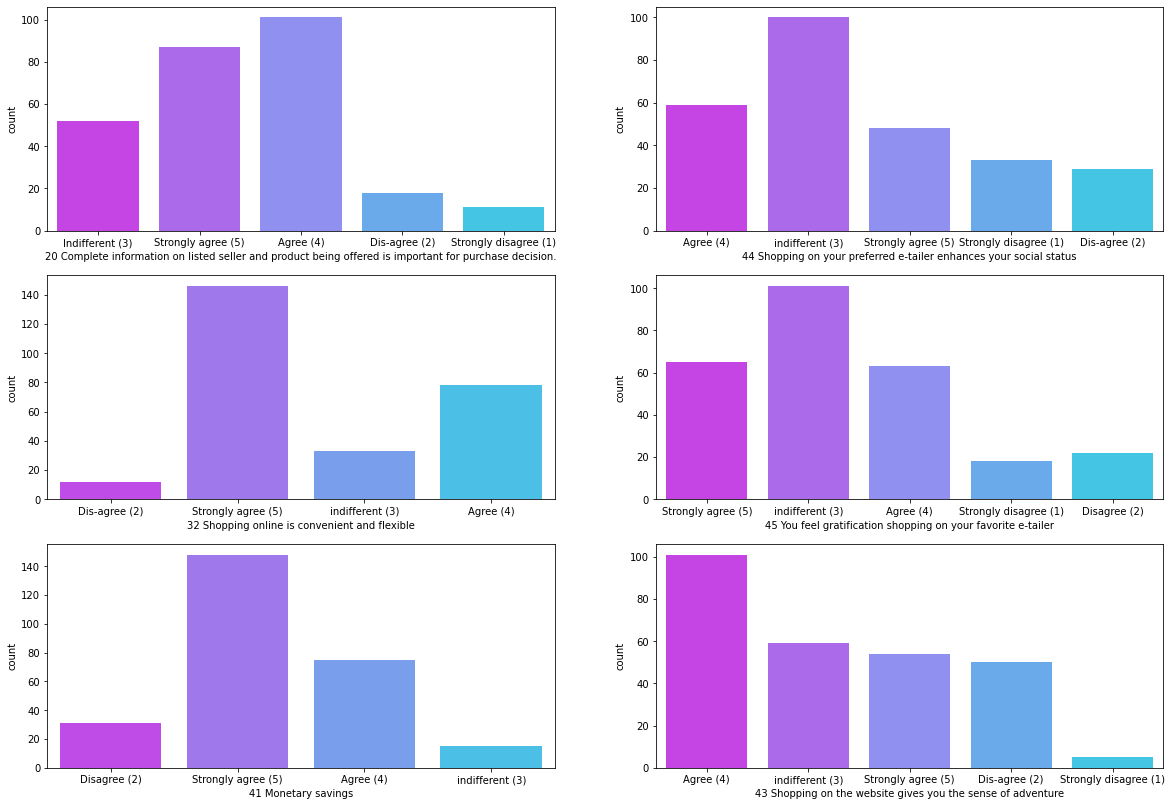

In [19]:
# Looking at the importance of hedonistic and utilitarial value

fig, ax = plt.subplots(3,2,figsize=(20,14))
sns.countplot(df.iloc[:,19],ax = ax[0,0],palette='cool_r')
sns.countplot(df.iloc[:,31],ax = ax[1,0],palette='cool_r')
sns.countplot(df.iloc[:,40],ax = ax[2,0],palette='cool_r')
sns.countplot(df.iloc[:,43],ax = ax[0,1],palette='cool_r')
sns.countplot(df.iloc[:,44],ax = ax[1,1],palette='cool_r')
sns.countplot(df.iloc[:,42],ax = ax[2,1],palette='cool_r')
plt.show()

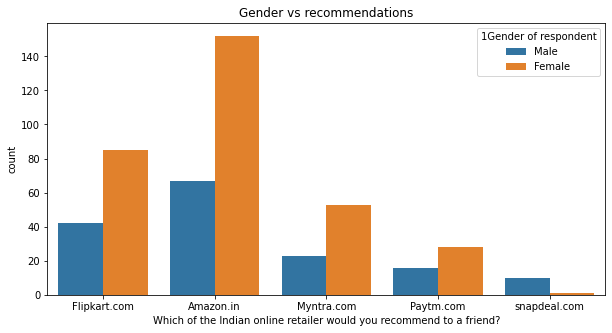

In [20]:
# Grouped barcharts

# Gender vs recommendations

plt.figure(figsize=(10,5))
sns.countplot(dt['Which of the Indian online retailer would you recommend to a friend?'],hue=dt['1Gender of respondent'])
plt.title('Gender vs recommendations')
plt.show()

In [21]:
# Age group vs recommendations

plt.figure(figsize=(12,5))
sns.countplot(d1['Which of the Indian online retailer would you recommend to a friend?'],hue = d1['2 How old are you? '])
plt.title('Age group vs recommendations')
plt.show()

NameError: name 'd1' is not defined

<Figure size 864x360 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(dt['Which of the Indian online retailer would you recommend to a friend?'],hue = dt['2 How old are you? '])
plt.title('Age group vs recommendations')
plt.show()

In [ ]:
# Here we analyse why amazon is the most recommended retailer
# We also try to analyse factors come out to be the strongest in regards to recommendation and retention.
for i in [48,51,54,56,59,60]:
    d = expand(df,df.columns[i])
    data = d.iloc[:,i].value_counts()
    labels = data.keys()
    plt.pie(data, autopct="%.1f%%",labels=labels)
    plt.title(d.columns[i])
    plt.show()

As we can see, customers value the complete information on products. It helps them in deciding on the purchase and also develops trust on the retailer. More than 35 percent people think that amazon provides relevent description on products which contributes to why it is being recommended the most.

There are also factors such as delivery speed, purchase quickness and good web application that support the retailers to gain the top spot. Customer activation can be achieved by offers and discounts, but services along with monetary benefits are of at most importance to carry on customer interest. The above factors along with presence of empathetic online assistence will develop a sense of dependency that is profitable.

Amazon being a worldwide retailer also tops in trustworthiness. We saw from the countplot that trust is one of the main things a customer believes is necessary to shop online, with that being the case it is no surprise that amazon is the most recommended retailer.

From all the graphical analysis, we see the factors that are deemed important by the consumers play a crucial role on the website being recommended. More recommendations is directly proportional to the numbers in customer activation and retention. These factors concern both utilitarin and hedonic value.

In [ ]:
# We will now look at the websites that lag especially during high influx - sales and promotion period

fig, ax = plt.subplots(2,2,figsize=(14,9))
a1 = expand(df,df.columns[63])
sns.countplot(a1.iloc[:,63],ax = ax[0,0],palette='rocket')
a2 = expand(df,df.columns[64])
sns.countplot(a2.iloc[:,64],ax = ax[0,1],palette='rocket')
a3 = expand(df,df.columns[66])
sns.countplot(a3.iloc[:,66],ax = ax[1,0],palette='rocket')
a4 = expand(df,df.columns[68])
sns.countplot(a4.iloc[:,68],ax = ax[1,1],palette='rocket')
plt.show()

As we know longer delivery period, longer page loading time due to low functioning effect the popularity of the retailers in a negative way. Also, disruption when traversing from one page to another is a problem faced by all the websites, especially those with larger customer bracket.

Paytm and snapdeal can be made examples of this negative effect as they are the least user recommended websites.

Even though myntra is prone to late declaration in price and amazon lags with more users, these shortcomings are balanced by other positive factors. But, it necessary for these problems to be treated by upgrading the functionality of the website.